# Covid-19 Data Analysis, Visual Representation & Statistical Research
__Presented By Ariell Dattage__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

### Dataset 1 Title: Coronavirus (COVID-19) Deaths

Data, statistical information and research retrieved from: https://ourworldindata.org/covid-deaths

In [2]:
file = pd.read_csv('covid-data.csv')

### Dataset 2 Title: COVID-19 Activity

Data, statistical information and research retrieved from: https://data.world/covid-19-data-resource-hub/covid-19-case-counts/workspace/file?filename=COVID-19+Activity.csv

In [34]:
file2 = pd.read_csv('covid-data2.csv')

### Dataset 1 Overview: Coronavirus (COVID-19) Deaths

In [4]:
file.shape

(152944, 67)

In [5]:
file.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
file.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152944 entries, 0 to 152943
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    152944 non-null  object 
 1   continent                                   143729 non-null  object 
 2   location                                    152944 non-null  object 
 3   date                                        152944 non-null  object 
 4   total_cases                                 150294 non-null  float64
 5   new_cases                                   150239 non-null  float64
 6   new_cases_smoothed                          149088 non-null  float64
 7   total_deaths                                133064 non-null  float64
 8   new_deaths                                  133236 non-null  float64
 9   new_deaths_smoothed                         133104 non-null  float64
 

In [8]:
file.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.502940e+05,1.502390e+05,1.490880e+05,1.330640e+05,133236.000000,133104.000000,149593.000000,149538.000000,148392.000000,132376.000000,...,97631.000000,96225.000000,63127.000000,113877.000000,142738.000000,125523.000000,5.234000e+03,5234.000000,5234.000000,5234.000000
mean,2.135135e+06,8.467375e+03,8.309280e+03,5.277387e+04,170.619067,170.100488,23411.883300,107.040595,103.589947,456.920736,...,10.584645,32.758263,50.814634,3.026685,73.596164,0.725868,3.479999e+04,9.011418,16.175762,857.853331
std,1.265274e+07,5.098362e+04,4.706157e+04,2.775011e+05,831.478667,812.194863,38180.684985,372.752514,249.590269,721.942654,...,10.498802,13.521998,31.813386,2.452814,7.489772,0.149988,9.949991e+04,16.669961,31.091730,1283.239325
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.195940e+04,-28.450000,-95.920000,-1745.051271
25%,1.574000e+03,1.000000e+00,5.857000e+00,6.800000e+01,0.000000,0.143000,512.697000,0.022000,1.444000,15.829000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-9.752500e+01,-0.870000,-0.520000,-37.856745
50%,2.067100e+04,7.000000e+01,9.171400e+01,6.750000e+02,2.000000,2.286000,4015.258000,10.052000,15.887000,105.723000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,2.580050e+03,5.505000,7.205000,401.789828
75%,2.560555e+05,9.230000e+02,9.741430e+02,6.457000e+03,19.000000,20.286000,30648.408000,86.622750,99.157000,622.097750,...,19.100000,41.300000,83.241000,4.000000,78.930000,0.845000,2.147995e+04,13.887500,22.687500,1456.137413
max,3.031694e+08,2.879121e+06,2.137567e+06,5.479804e+06,18062.000000,14704.714000,341391.525000,51427.491000,7749.176000,6084.669000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.043824e+06,115.000000,374.340000,7912.067517


### Dataset 2 Overview: COVID-19 Activity

In [9]:
file2.shape

(2570924, 13)

In [10]:
file2.head()

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,303,Sherburne,Minnesota,2020-07-02,America,New York Times,1,27141.0,USA,United States,US,6,5
1,307,Sherburne,Minnesota,2020-07-03,America,New York Times,0,27141.0,USA,United States,US,4,5
2,307,Sherburne,Minnesota,2020-07-04,America,New York Times,0,27141.0,USA,United States,US,0,5
3,312,Sherburne,Minnesota,2020-07-05,America,New York Times,0,27141.0,USA,United States,US,5,5
4,317,Sherburne,Minnesota,2020-07-06,America,New York Times,0,27141.0,USA,United States,US,5,5


In [11]:
file2.columns

Index(['PEOPLE_POSITIVE_CASES_COUNT', 'COUNTY_NAME', 'PROVINCE_STATE_NAME',
       'REPORT_DATE', 'CONTINENT_NAME', 'DATA_SOURCE_NAME',
       'PEOPLE_DEATH_NEW_COUNT', 'COUNTY_FIPS_NUMBER', 'COUNTRY_ALPHA_3_CODE',
       'COUNTRY_SHORT_NAME', 'COUNTRY_ALPHA_2_CODE',
       'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT'],
      dtype='object')

In [12]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570924 entries, 0 to 2570923
Data columns (total 13 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   PEOPLE_POSITIVE_CASES_COUNT      int64  
 1   COUNTY_NAME                      object 
 2   PROVINCE_STATE_NAME              object 
 3   REPORT_DATE                      object 
 4   CONTINENT_NAME                   object 
 5   DATA_SOURCE_NAME                 object 
 6   PEOPLE_DEATH_NEW_COUNT           int64  
 7   COUNTY_FIPS_NUMBER               float64
 8   COUNTRY_ALPHA_3_CODE             object 
 9   COUNTRY_SHORT_NAME               object 
 10  COUNTRY_ALPHA_2_CODE             object 
 11  PEOPLE_POSITIVE_NEW_CASES_COUNT  int64  
 12  PEOPLE_DEATH_COUNT               int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 255.0+ MB


In [13]:
file2.describe()

,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
count,2.570924e+06,2.570924e+06,2.329832e+06,2.570924e+06,2.570924e+06
mean,3.059569e+04,2.147014e+00,3.147197e+04,1.245063e+02,6.656826e+02
std,4.643439e+05,3.767672e+01,1.636533e+04,2.355573e+03,9.741924e+03
min,0.000000e+00,-1.131700e+04,1.001000e+03,-3.491160e+05,0.000000e+00
25%,9.200000e+01,0.000000e+00,1.903500e+04,0.000000e+00,1.000000e+00
50%,1.047000e+03,0.000000e+00,3.002600e+04,1.000000e+00,1.800000e+01
75%,4.265000e+03,0.000000e+00,4.611900e+04,1.200000e+01,7.700000e+01
max,3.631793e+07,8.786000e+03,7.803000e+04,8.232250e+05,6.208300e+05


### Data Analysis, Visual Representation and Statistical Research

__Hypothesis:__ Contracting the Covid-19 Virus can be fatal.

In [14]:
total_deaths = file['total_deaths'].count()
print(f'Total Deaths in Dataset 1: {total_deaths}')

Total Deaths in Dataset 1: 133064


In [15]:
total_cases = file['total_cases'].count()
print(f'Total Positive Cases in Dataset 1: {total_cases}')

Total Positive Cases in Dataset 1: 150294


In [16]:
total_deaths2 = file2['PEOPLE_DEATH_COUNT'].count()
print(f'Total Deaths in Dataset 2: {total_deaths2}')

Total Deaths in Dataset 2: 2570924


In [17]:
total_cases2 = file2['PEOPLE_POSITIVE_CASES_COUNT'].count()
print(f'Total Positive Cases in Dataset 2: {total_cases2}')

Total Positive Cases in Dataset 2: 2570924


__Answer:__ Statistical research of both datasets show that there is correlation between the Covid-19 virus and mortality rates.

In [18]:
file[['total_cases', 'total_deaths']].corr()

,total_cases,total_deaths
total_cases,1.000000,0.984466
total_deaths,0.984466,1.000000


In [19]:
file2[['PEOPLE_DEATH_COUNT', 'PEOPLE_POSITIVE_CASES_COUNT']].corr()

,PEOPLE_DEATH_COUNT,PEOPLE_POSITIVE_CASES_COUNT
PEOPLE_DEATH_COUNT,1.000000,0.893967
PEOPLE_POSITIVE_CASES_COUNT,0.893967,1.000000


__Hypothesis:__ The presence of smoking is related to increased fatal mortalities.

In [20]:
file[['male_smokers', 'female_smokers', 'total_deaths']].corr()

,male_smokers,female_smokers,total_deaths
male_smokers,1.000000,0.206306,-0.004893
female_smokers,0.206306,1.000000,-0.007291
total_deaths,-0.004893,-0.007291,1.000000


In [21]:
male_smokers = file['male_smokers'].count()
print(f'Male Smokers : {male_smokers}')

Male Smokers : 96225


In [22]:
female_smokers = file['female_smokers'].count()
print(f'Female Smokers: {female_smokers}')

Female Smokers: 97631


__Answer:__ Data analysis does not support original hypothesis. There is no correlation between smokers and increased mortality rates due to Covid-19.

<AxesSubplot:>

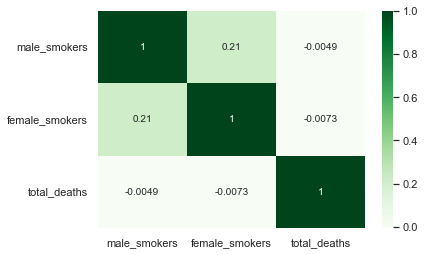

In [75]:
sns.heatmap(file[['male_smokers', 'female_smokers', 'total_deaths']].corr(), cmap="Greens", annot=True)

__Hypothesis:__ ICU and hospitilization directly coorelates with individuals that test positive for the Covid-19 Virus.

In [72]:
file[['total_cases', 'positive_rate', 'icu_patients', 'hosp_patients']].corr()

,total_cases,positive_rate,icu_patients,hosp_patients
total_cases,1.000000,-0.016405,0.760832,0.711487
positive_rate,-0.016405,1.000000,0.155454,0.189667
icu_patients,0.760832,0.155454,1.000000,0.964496
hosp_patients,0.711487,0.189667,0.964496,1.000000


In [68]:
total_cases = file['total_cases'].count()
print(f'Total Cases: {total_cases}')

Total Cases: 150294


In [73]:
positive_rate = file['positive_rate'].count()
print(f'Positive Rate: {positive_rate}')

Positive Rate: 69318


In [63]:
icu_patients = file['icu_patients'].count()
print(f'ICU Patients: {icu_patients}')

ICU Patients: 19314


In [64]:
hosp_patients = file['hosp_patients'].count()
print(f'Hospital Patients: {hosp_patients}')

Hospital Patients: 21292


__Answer:__ Data analysis supports the original hypothesis. There is a correlation between testing postive for Covid-19 and increased hospitalizations.

<AxesSubplot:>

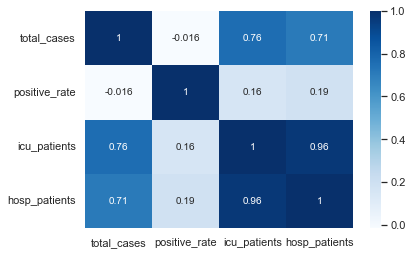

In [74]:
sns.heatmap(file[['total_cases', 'positive_rate', 'icu_patients', 'hosp_patients']].corr(), cmap="Blues", annot=True)

__Hypothesis:__ Age directly coorelates with increased mortality rates amongst individuals that contract the Covid-19.

In [42]:
file[['aged_65_older', 'aged_70_older', 'total_deaths']].corr()

,aged_65_older,aged_70_older,total_deaths
aged_65_older,1.000000,0.994370,0.026061
aged_70_older,0.994370,1.000000,0.023622
total_deaths,0.026061,0.023622,1.000000


In [25]:
aged_65_older = file['aged_65_older'].count()
print(f'Aged 65 & Older : {aged_65_older}')

Aged 65 & Older : 125664


In [26]:
aged_70_older = file['aged_70_older'].count()
print(f'Aged 70 & Older : {aged_70_older}')

Aged 70 & Older : 126362


__Answer:__ Data analysis supports the original hypothesis, that age directly coorelates with an increase in Covid-19 death rates.

<AxesSubplot:>

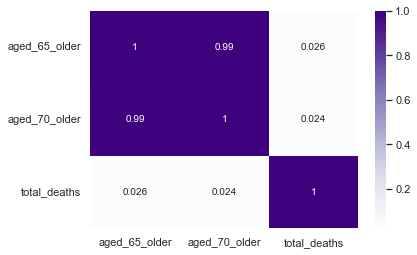

In [84]:
sns.heatmap(file[['aged_65_older', 'aged_70_older', 'total_deaths']].corr(), cmap="Purples", annot=True)

__Hypothesis:__ Being fully vaccinated decreases fatal mortality rates. 

In [28]:
file[['people_fully_vaccinated', 'total_deaths']].corr()

,people_fully_vaccinated,total_deaths
people_fully_vaccinated,1.000000,0.772387
total_deaths,0.772387,1.000000


In [29]:
people_fully_vaccinated = file['people_fully_vaccinated'].count()
print(f'People Fully Vaccinated : {people_fully_vaccinated}')

People Fully Vaccinated : 34818


__Answer:__ Data analysis supports the original hypothesis, that being fully vaccinated against Covid-19 decreases mortality rates.

<AxesSubplot:>

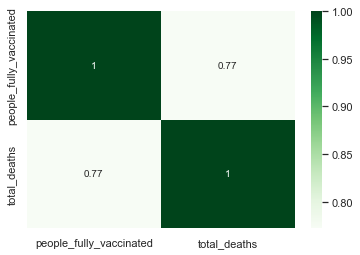

In [85]:
sns.heatmap(file[['people_fully_vaccinated', 'total_deaths']].corr(), cmap="Greens", annot=True)

__Hypothesis:__ Being in extrememe poverty decreases survival rates.

In [48]:
file[['extreme_poverty', 'total_deaths']].corr()

,extreme_poverty,total_deaths
extreme_poverty,1.000000,-0.041865
total_deaths,-0.041865,1.000000


In [49]:
extreme_poverty = file['extreme_poverty'].count()
print(f'People Experincing Extreme Poverty : {extreme_poverty}')

People Experincing Extreme Poverty : 84133


<AxesSubplot:>

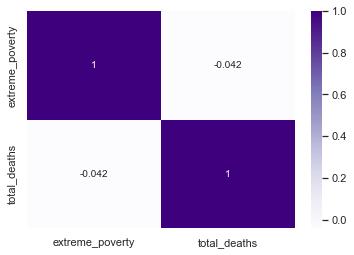

In [86]:
sns.heatmap(file[['extreme_poverty', 'total_deaths']].corr(), cmap="Purples", annot=True)

__Answer:__ Data analysis does not support original hypothesis. There is no correlation between poverty levels and increased mortality rates due to Covid-19.